In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

from data_factory import parse_train_data, parse_predict_data
from omniglot_model import omniglot
from utils import omnoiglot_get_weights

In [2]:
### Parameters

data_path = "data"
learning_rate = 0.01
epochs = 10
batch_size = 3

## Data for fine tuning

In [3]:
### Prepararing the data for fine tuning

X_train, y_train = parse_train_data(data_path)

print(X_train.shape)
print(y_train.shape)

(3, 28, 28, 1)
(3, 3)


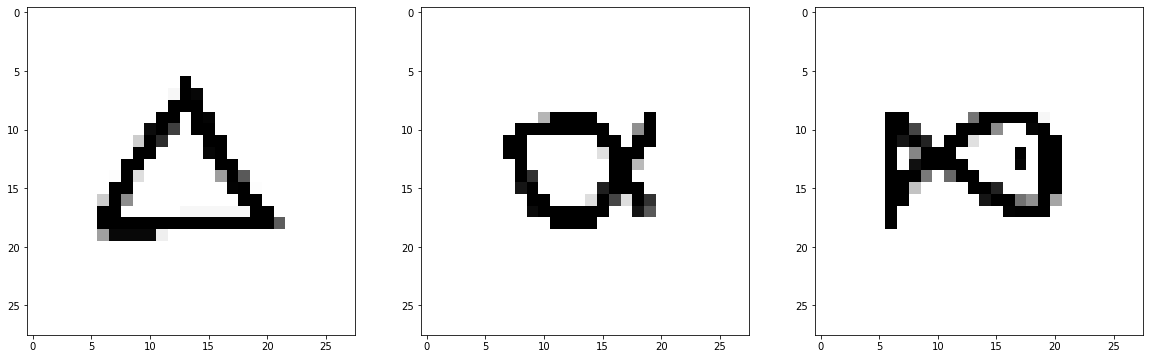

In [4]:
### Showing Images of the 3 classes after reshape 28x28x1

plt.figure(figsize=(20,20))
plt.subplot(131)
imgplot = plt.imshow(X_train[0,:,:,0], cmap="gist_gray")
plt.subplot(132)
imgplot = plt.imshow(X_train[1,:,:,0], cmap="gist_gray")
plt.subplot(133)
imgplot = plt.imshow(X_train[2,:,:,0], cmap="gist_gray")

## Preparing the model

In [5]:
### Preparing the model
model = omniglot(input_shape=X_train.shape[1:], num_classes=y_train.shape[1])

### Load weights of pretrained model
X = omnoiglot_get_weights()
model.layers[0].set_weights([X[0]])
model.layers[3].set_weights([X[6]])
model.layers[6].set_weights([X[12]])
model.layers[9].set_weights([X[18]])
model.layers[1].set_weights([X[2], X[4], np.array([0]*24), np.array([1]*24)])
model.layers[4].set_weights([X[8], X[10], np.array([0]*24), np.array([1]*24)])
model.layers[7].set_weights([X[14], X[16], np.array([0]*24), np.array([1]*24)])
model.layers[10].set_weights([X[20], X[22], np.array([0]*24), np.array([1]*24)])
model.layers[13].set_weights([X[24], X[26]])


model.compile(loss=tf.compat.v1.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate),
              metrics=[tf.compat.v1.keras.metrics.CategoricalAccuracy()])

model.summary()

W0722 10:24:06.102714 4706899392 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 24)        216       
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 24)        96        
_________________________________________________________________
re_lu (ReLU)                 (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 24)          5184      
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 24)          96        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 7, 7, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 24)          5

## Fine tuning

In [6]:
model.fit(X_train, y_train,
          steps_per_epoch=(X_train.shape[0]//batch_size),
          epochs=epochs,)

Epoch 1/10
1/1 [==============================] - 0s 183ms/step - loss: 0.9521 - categorical_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 3.1727e-04 - categorical_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 5.9325e-04 - categorical_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 6.4070e-04 - categorical_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 8.5779e-04 - categorical_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 7.1456e-04 - categorical_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 4.5829e-04 - categorical_accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 2.6222e-04 - categorical_accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1.5622e-04 - categorical_accuracy: 1

## Prediction

In [7]:
X_predict = parse_predict_data(data_path)

print(X_predict.shape)

(1, 28, 28, 1)


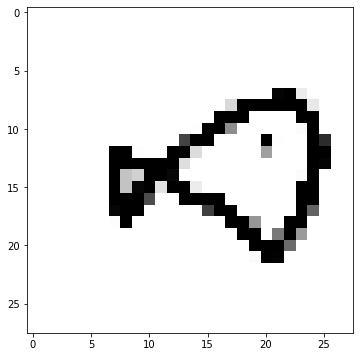

In [15]:
###### Showing the image with class to predict

plt.figure(figsize=(6,6))
imgplot = plt.imshow(X_predict[0,:,:,0], cmap="gist_gray")

In [14]:
result = model.predict(X_predict)[0]
print("The predicted classe is " + str(np.argmax(result)))

The predicted classe is 1
